In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import pandas as pd
import random
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-4-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-4-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='phase')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_4_amp = np.stack(array_list)

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-8-genam-202209')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-8-genam-202209', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='phase')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_8_amp = np.stack(array_list)

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-16-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-16-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='phase')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_16_amp = np.stack(array_list)

In [ ]:
file_list = os.listdir('/content/drive/MyDrive/MSc data/data-32-genam-202210')
array_list = []
for file_name in file_list:
  file_path = os.path.join('/content/drive/MyDrive/MSc data/data-32-genam-202210', file_name)
  df = pd.read_csv(file_path)
  x_values = df['Points:0'].unique()
  y_values = df['Points:1'].unique()
  z_values = df['Points:2'].unique()
  x_len = len(x_values)
  y_len = len(y_values)
  z_len = len(z_values)
  pivot_df = df.pivot_table(index='Points:2', columns=['Points:1', 'Points:0'], values='phase')
  array_3d = np.array([pivot_df[col].values for col in pivot_df.columns]).reshape(x_len, y_len, z_len)
  array_list.append(array_3d)
real_data_32_amp = np.stack(array_list)

In [ ]:
real_data_4_amp = torch.tensor(real_data_4_amp, dtype=torch.float32)
real_data_8_amp = torch.tensor(real_data_8_amp, dtype=torch.float32)
real_data_16_amp = torch.tensor(real_data_16_amp, dtype=torch.float32)
real_data_32_amp = torch.tensor(real_data_32_amp, dtype=torch.float32)

In [ ]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [ ]:
real_data_4_amp_normalized = real_data_4_amp_normalized.view(1024,100)
real_data_8_amp_normalized = real_data_8_amp_normalized.view(1024,567)
real_data_16_amp_normalized = real_data_16_amp_normalized.view(1024,3468)
real_data_32_amp_normalized = real_data_32_amp_normalized.view(1024,25047)

In [ ]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized = real_data_4_amp_normalized[random_indices]
training_4_amp = real_data_4_amp_normalized[:900, :]
test_4_amp = real_data_4_amp_normalized[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized = real_data_8_amp_normalized[random_indices]
training_8_amp = real_data_8_amp_normalized[:900, :]
test_8_amp = real_data_8_amp_normalized[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized = real_data_16_amp_normalized[random_indices]
training_16_amp = real_data_16_amp_normalized[:900, :]
test_16_amp = real_data_16_amp_normalized[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized = real_data_32_amp_normalized[random_indices]
training_32_amp = real_data_32_amp_normalized[:900, :]
test_32_amp = real_data_32_amp_normalized[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

# MLP

In [ ]:
def compute_cosine_similarity(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("different size")
    vector1 = array1.reshape(-1)
    vector2 = array2.reshape(-1)

    dot_product = np.dot(vector1, vector2)

    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)

    cosine_similarity = dot_product / (norm1 * norm2)

    return cosine_similarity

In [ ]:
def compute_ssim_3d(array1, array2, win_size=3):
    if array1.shape != array2.shape:
        raise ValueError("different size")

    ssim_values = []

    for i in range(array1.shape[0]):
        slice1 = array1[i, :, :]
        slice2 = array2[i, :, :]
        ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)
        ssim_values.append(ssim_score)

    mean_ssim = np.mean(ssim_values)
    return mean_ssim

In [ ]:
def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

In [ ]:
class VAE4MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE4MLP, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        )
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )

    def encode(self, x):
        hidden = self.encoder(x)
        mu = self.fc_mu(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
input_dim = 100
learning_rate = 1e-2
num_epochs = 500

In [ ]:
cos_result_array = []
ssim_result_array = []
for h in range(5,15):
  hidden_dim = 5*h
  for l in range(1,4):
    latent_dim = 5*l
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    for epoch in range(num_epochs):
      total_loss = 0
      for data in train_loader_4:
         data = data.to(device)
         reconstructed_x, mu, logvar = model(data)
         loss = vae_loss(reconstructed_x, data, mu, logvar)
         total_loss += loss.item()
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
    print("hidden_dim = :", hidden_dim)
    model.eval()
    with torch.no_grad():
      reconstructed_x, mu, logvar = model(test_4_amp)
    cos_result_array.append([hidden_dim, latent_dim, compute_cosine_similarity(reconstructed_x,test_4_amp)])
    reconstructed_x_ssim = reconstructed_x.view(124, 4, 5, 5).numpy()
    test_4_amp_ssim = test_4_amp.view(124, 4, 5, 5).numpy()
    ssim_values = []
    for i in range(test_4_amp_ssim.shape[0]):
      ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
      ssim_values.append([ssim_score])
    ssim_values_mean = np.array(ssim_values).mean()
    ssim_result_array.append([hidden_dim, latent_dim, ssim_values_mean])
ssim_result_array = np.array(ssim_result_array)
cos_result_array = np.array(cos_result_array)

hidden_dim = : 25


<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


hidden_dim = : 25
hidden_dim = : 25
hidden_dim = : 30
hidden_dim = : 30
hidden_dim = : 30
hidden_dim = : 35
hidden_dim = : 35
hidden_dim = : 35
hidden_dim = : 40
hidden_dim = : 40
hidden_dim = : 40
hidden_dim = : 45
hidden_dim = : 45
hidden_dim = : 45
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 55
hidden_dim = : 55
hidden_dim = : 55
hidden_dim = : 60
hidden_dim = : 60
hidden_dim = : 60
hidden_dim = : 65
hidden_dim = : 65
hidden_dim = : 65
hidden_dim = : 70
hidden_dim = : 70
hidden_dim = : 70


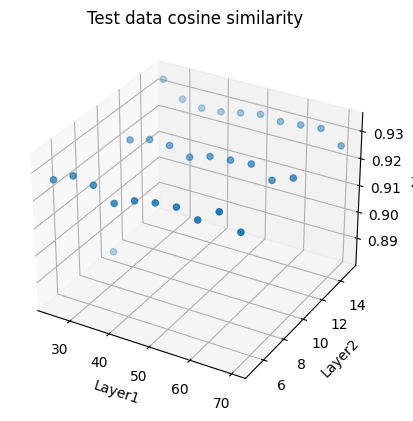

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = cos_result_array[:, 0]
y = cos_result_array[:, 1]
z = cos_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data cosine similarity')
plt.show()

In [ ]:
z.max()

0.9331014156341553

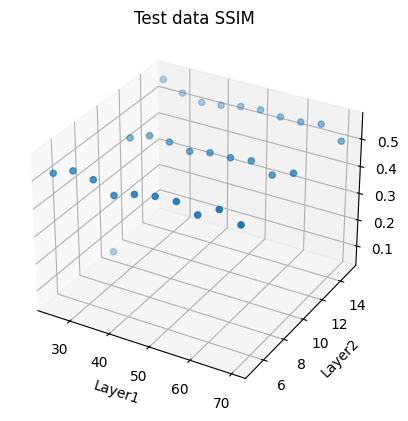

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ssim_result_array[:, 0]
y = ssim_result_array[:, 1]
z = ssim_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data SSIM')
plt.show()

In [ ]:
z.max()

0.5591546551974282

In [ ]:
input_dim = 567
learning_rate = 1e-2
num_epochs = 500

In [ ]:
cos_result_array = []
ssim_result_array = []
for h in range(1,8):
  hidden_dim = 50*h
  for l in range(1,6):
    latent_dim = 10*l
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()
    for epoch in range(num_epochs):
      total_loss = 0
      for data in train_loader_8:
         data = data.to(device)
         reconstructed_x, mu, logvar = model(data)
         loss = vae_loss(reconstructed_x, data, mu, logvar)
         total_loss += loss.item()
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()
    print("hidden_dim = :", hidden_dim)
    model.eval()
    with torch.no_grad():
      reconstructed_x, mu, logvar = model(test_8_amp)
    cos_result_array.append([hidden_dim, latent_dim, compute_cosine_similarity(reconstructed_x,test_8_amp)])
    reconstructed_x_ssim = reconstructed_x.view(124, 7, 9, 9).numpy()
    test_8_amp_ssim = test_8_amp.view(124, 7, 9, 9).numpy()
    ssim_values = []
    for i in range(test_8_amp_ssim.shape[0]):
      ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
      ssim_values.append([ssim_score])
    ssim_values_mean = np.array(ssim_values).mean()
    ssim_result_array.append([hidden_dim, latent_dim, ssim_values_mean])
ssim_result_array = np.array(ssim_result_array)
cos_result_array = np.array(cos_result_array)

hidden_dim = : 50


<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 50
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 100
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 150
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 200
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 250
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 300
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350
hidden_dim = : 350


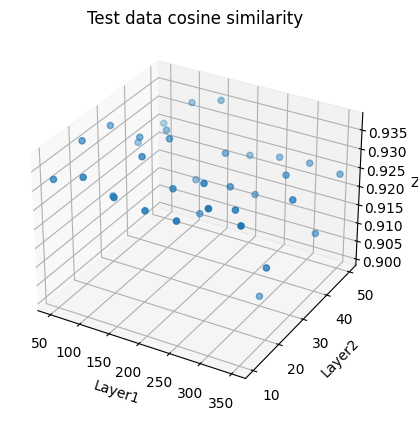

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = cos_result_array[:, 0]
y = cos_result_array[:, 1]
z = cos_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data cosine similarity')
plt.show()

In [ ]:
z.max()

0.9369069933891296

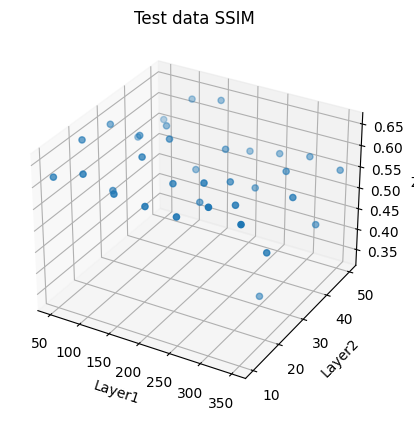

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = ssim_result_array[:, 0]
y = ssim_result_array[:, 1]
z = ssim_result_array[:, 2]
ax.scatter(x, y, z)
ax.set_xlabel('Layer1')
ax.set_ylabel('Layer2')
ax.set_zlabel('Z')
ax.set_title('Test data SSIM')
plt.show()

In [ ]:
z.max()

0.652841228074574

In [ ]:
input_dim = 3468
learning_rate = 1e-2
num_epochs = 1200
hidden_dim =500
latent_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE4MLP(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
  total_loss = 0
  for data in train_loader_16:
    data = data.to(device)
    reconstructed_x, mu, logvar = model(data)
    loss = vae_loss(reconstructed_x, data, mu, logvar)
    total_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

Epoch 1/1200, Loss: 314794308121.8906
Epoch 2/1200, Loss: 21818354801469.344
Epoch 3/1200, Loss: 3465245.40625
Epoch 4/1200, Loss: 2637331.625
Epoch 5/1200, Loss: 2626122.90625
Epoch 6/1200, Loss: 2843787.4375
Epoch 7/1200, Loss: 2589959.625
Epoch 8/1200, Loss: 2444440.40625
Epoch 9/1200, Loss: 2341839.109375
Epoch 10/1200, Loss: 2362613.71875
Epoch 11/1200, Loss: 2288933.5
Epoch 12/1200, Loss: 2224262.125
Epoch 13/1200, Loss: 2193671.75
Epoch 14/1200, Loss: 2177950.671875
Epoch 15/1200, Loss: 2171906.828125
Epoch 16/1200, Loss: 2167156.46875
Epoch 17/1200, Loss: 2164146.28125
Epoch 18/1200, Loss: 2162235.578125
Epoch 19/1200, Loss: 2161444.296875
Epoch 20/1200, Loss: 2161378.578125
Epoch 21/1200, Loss: 2161250.15625
Epoch 22/1200, Loss: 2161272.609375
Epoch 23/1200, Loss: 2161250.078125
Epoch 24/1200, Loss: 2161240.46875
Epoch 25/1200, Loss: 2161265.25
Epoch 26/1200, Loss: 2162131.125
Epoch 27/1200, Loss: 2162130.125
Epoch 28/1200, Loss: 2161567.734375
Epoch 29/1200, Loss: 2162468.968

In [ ]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_16_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.87023467

In [ ]:
reconstructed_x_ssim = reconstructed_x.view(124, 12, 17, 17).numpy()
test_16_amp_ssim = test_16_amp.view(124, 12, 17, 17).numpy()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.055163116345042576

# 2D CNN

In [ ]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [ ]:
real_data_4_amp_normalized_CNN = real_data_4_amp_normalized.permute(0, 3, 1, 2)
real_data_8_amp_normalized_CNN = real_data_8_amp_normalized.permute(0, 3, 1, 2)
real_data_16_amp_normalized_CNN = real_data_16_amp_normalized.permute(0, 3, 1, 2)
real_data_32_amp_normalized_CNN = real_data_32_amp_normalized.permute(0, 3, 1, 2)

In [ ]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized_CNN = real_data_4_amp_normalized_CNN[random_indices]
training_4_amp = real_data_4_amp_normalized_CNN[:900, :]
test_4_amp = real_data_4_amp_normalized_CNN[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized_CNN = real_data_8_amp_normalized_CNN[random_indices]
training_8_amp = real_data_8_amp_normalized_CNN[:900, :]
test_8_amp = real_data_8_amp_normalized_CNN[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized_CNN = real_data_16_amp_normalized_CNN[random_indices]
training_16_amp = real_data_16_amp_normalized_CNN[:900, :]
test_16_amp = real_data_16_amp_normalized_CNN[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized_CNN = real_data_32_amp_normalized_CNN[random_indices]
training_32_amp = real_data_32_amp_normalized_CNN[:900, :]
test_32_amp = real_data_32_amp_normalized_CNN[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 2 * 2, 100),
                                      nn.ReLU(),
                                      nn.Linear(100, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 2 * 2, 100),
                                        nn.ReLU(),
                                        nn.Linear(100, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 2 * 2)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=4, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 2000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_4:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/2000, Loss: 62394.31298828125
Epoch 2/2000, Loss: 62375.8505859375
Epoch 3/2000, Loss: 62356.63671875
Epoch 4/2000, Loss: 62355.947265625
Epoch 5/2000, Loss: 62350.47509765625
Epoch 6/2000, Loss: 62345.794921875
Epoch 7/2000, Loss: 62338.6279296875
Epoch 8/2000, Loss: 62336.197265625
Epoch 9/2000, Loss: 62277.109375
Epoch 10/2000, Loss: 61975.6376953125
Epoch 11/2000, Loss: 61761.107421875
Epoch 12/2000, Loss: 61437.0751953125
Epoch 13/2000, Loss: 61313.92333984375
Epoch 14/2000, Loss: 61033.64111328125
Epoch 15/2000, Loss: 60952.6572265625
Epoch 16/2000, Loss: 60751.73583984375
Epoch 17/2000, Loss: 60733.5517578125
Epoch 18/2000, Loss: 60574.92724609375
Epoch 19/2000, Loss: 60661.3154296875
Epoch 20/2000, Loss: 60616.8291015625
Epoch 21/2000, Loss: 60593.69091796875
Epoch 22/2000, Loss: 60537.8818359375
Epoch 23/2000, Loss: 60565.5146484375
Epoch 24/2000, Loss: 60495.33642578125
Epoch 25/2000, Loss: 60489.82568359375
Epoch 26/2000, Loss: 60371.6376953125
Epoch 27/2000, Loss: 6

In [ ]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_4_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_4_amp)

0.92270654

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_4_amp_ssim = test_4_amp.numpy()
ssim_values = []
for i in range(test_4_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.495433875757634

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=7, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 3 * 3, 100),
                                      nn.ReLU(),
                                      nn.Linear(100, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 3 * 3, 100),
                                        nn.ReLU(),
                                        nn.Linear(100, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 3 * 3)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=7, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 3, 3)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 2000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_8:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/2000, Loss: 353897.34765625
Epoch 2/2000, Loss: 353655.96484375
Epoch 3/2000, Loss: 353638.203125
Epoch 4/2000, Loss: 353237.046875
Epoch 5/2000, Loss: 350111.10546875
Epoch 6/2000, Loss: 347268.87109375
Epoch 7/2000, Loss: 344860.48828125
Epoch 8/2000, Loss: 343144.0
Epoch 9/2000, Loss: 341861.51171875
Epoch 10/2000, Loss: 341094.8203125
Epoch 11/2000, Loss: 340264.9140625
Epoch 12/2000, Loss: 339881.62890625
Epoch 13/2000, Loss: 339730.95703125
Epoch 14/2000, Loss: 339679.11328125
Epoch 15/2000, Loss: 339545.43359375
Epoch 16/2000, Loss: 339113.2578125
Epoch 17/2000, Loss: 339058.07421875
Epoch 18/2000, Loss: 338785.2890625
Epoch 19/2000, Loss: 338216.9453125
Epoch 20/2000, Loss: 337724.07421875
Epoch 21/2000, Loss: 335609.23046875
Epoch 22/2000, Loss: 334452.046875
Epoch 23/2000, Loss: 332917.4140625
Epoch 24/2000, Loss: 331172.19140625
Epoch 25/2000, Loss: 330027.3359375
Epoch 26/2000, Loss: 329715.01953125
Epoch 27/2000, Loss: 329682.5625
Epoch 28/2000, Loss: 328918.855468

In [ ]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_8_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_8_amp)

0.944626

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_8_amp_ssim = test_8_amp.numpy()
ssim_values = []
for i in range(test_8_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.6220247889641916

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(64 * 5 * 5, 300),
                                      nn.ReLU(),
                                      nn.Linear(300, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(64 * 5 * 5, 300),
                                        nn.ReLU(),
                                        nn.Linear(300, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 300),
                                nn.ReLU(),
                                nn.Linear(300, 64 * 5 * 5)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=12, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 5, 5)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_16:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 2165126.921875
Epoch 2/1000, Loss: 2163206.03125
Epoch 3/1000, Loss: 2163135.09375
Epoch 4/1000, Loss: 2161828.84375
Epoch 5/1000, Loss: 2158023.390625
Epoch 6/1000, Loss: 2157412.390625
Epoch 7/1000, Loss: 2139547.671875
Epoch 8/1000, Loss: 2129142.53125
Epoch 9/1000, Loss: 2123029.765625
Epoch 10/1000, Loss: 2119615.390625
Epoch 11/1000, Loss: 2117658.015625
Epoch 12/1000, Loss: 2114890.8125
Epoch 13/1000, Loss: 2111255.296875
Epoch 14/1000, Loss: 2107818.75
Epoch 15/1000, Loss: 2102106.1875
Epoch 16/1000, Loss: 2092989.703125
Epoch 17/1000, Loss: 2086990.125
Epoch 18/1000, Loss: 2078541.5625
Epoch 19/1000, Loss: 2072537.0625
Epoch 20/1000, Loss: 2064342.046875
Epoch 21/1000, Loss: 2058727.875
Epoch 22/1000, Loss: 2050357.6875
Epoch 23/1000, Loss: 2041933.71875
Epoch 24/1000, Loss: 2034899.59375
Epoch 25/1000, Loss: 2029403.859375
Epoch 26/1000, Loss: 2023967.3125
Epoch 27/1000, Loss: 2018925.46875
Epoch 28/1000, Loss: 2015835.953125
Epoch 29/1000, Loss: 2010295.9

In [ ]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_16_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.94650877

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_16_amp_ssim = test_16_amp.numpy()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.5459134976618304

In [ ]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=23, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=48, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mean = nn.Sequential( nn.Linear(128 * 3 * 3, 300),
                                      nn.ReLU(),
                                      nn.Linear(300, latent_dim)
        )
        self.fc_logvar = nn.Sequential( nn.Linear(128 * 3 * 3, 300),
                                        nn.ReLU(),
                                        nn.Linear(300, latent_dim)
        )
        self.fc = nn.Sequential(nn.Linear(latent_dim, 300),
                                nn.ReLU(),
                                nn.Linear(300, 128 * 3 * 3)
                                )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=64, out_channels=48, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=48, out_channels=32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=23, kernel_size=3, stride=2, padding=1),
            nn.Sigmoid()  # For binary data (e.g., images in [0, 1])
        )
        self.flatten = nn.Flatten(start_dim=1)

    def encode(self, x):
        hidden = self.encoder(x)
        #hidden = hidden.reshape(-1)
        #hidden = hidden.view(hidden.size(0), -1)
        hidden = self.flatten(hidden)
        mu = self.fc_mean(hidden)
        logvar = self.fc_logvar(hidden)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 128, 3, 3)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
latent_dim = 9
learning_rate = 1e-2
num_epochs = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def vae_loss(reconstructed_x, x, mu, logvar):
    reconstruction_loss = F.binary_cross_entropy(reconstructed_x, x, reduction='sum')

    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    total_loss = reconstruction_loss + kl_divergence
    return total_loss

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_32:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 15673318.625
Epoch 2/1000, Loss: 15623210.625
Epoch 3/1000, Loss: 15622486.875
Epoch 4/1000, Loss: 15622399.25
Epoch 5/1000, Loss: 15620907.5
Epoch 6/1000, Loss: 15637986.75
Epoch 7/1000, Loss: 15630700.25
Epoch 8/1000, Loss: 15623783.0
Epoch 9/1000, Loss: 15622614.125
Epoch 10/1000, Loss: 15622450.75
Epoch 11/1000, Loss: 15621645.0
Epoch 12/1000, Loss: 15607341.625
Epoch 13/1000, Loss: 15574076.875
Epoch 14/1000, Loss: 15531578.375
Epoch 15/1000, Loss: 15509795.0
Epoch 16/1000, Loss: 15496190.625
Epoch 17/1000, Loss: 15465592.0
Epoch 18/1000, Loss: 15452721.25
Epoch 19/1000, Loss: 15435780.875
Epoch 20/1000, Loss: 15410302.625
Epoch 21/1000, Loss: 15361810.875
Epoch 22/1000, Loss: 15312609.75
Epoch 23/1000, Loss: 15269938.875
Epoch 24/1000, Loss: 15249709.5
Epoch 25/1000, Loss: 15203856.25
Epoch 26/1000, Loss: 15170614.125
Epoch 27/1000, Loss: 15138824.875
Epoch 28/1000, Loss: 15094261.625
Epoch 29/1000, Loss: 15054703.5
Epoch 30/1000, Loss: 15016920.625
Epoch 31/1

In [ ]:
model.eval()
with torch.no_grad():
  reconstructed_x, mu, logvar = model(test_32_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_32_amp)

0.93788445

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
test_32_amp_ssim = test_32_amp.numpy()
ssim_values = []
for i in range(test_32_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_32_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.43041314617625587

# 3D CNN

In [ ]:
data_min = torch.min(real_data_4_amp)
data_max = torch.max(real_data_4_amp)
real_data_4_amp_normalized = (real_data_4_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_8_amp)
data_max = torch.max(real_data_8_amp)
real_data_8_amp_normalized = (real_data_8_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_16_amp)
data_max = torch.max(real_data_16_amp)
real_data_16_amp_normalized = (real_data_16_amp - data_min) / (data_max - data_min)
data_min = torch.min(real_data_32_amp)
data_max = torch.max(real_data_32_amp)
real_data_32_amp_normalized = (real_data_32_amp - data_min) / (data_max - data_min)

In [ ]:
real_data_4_amp_normalized = real_data_4_amp_normalized.permute(0, 3, 1, 2)
real_data_4_amp_normalized = real_data_4_amp_normalized.unsqueeze(1)
real_data_8_amp_normalized = real_data_8_amp_normalized.permute(0, 3, 1, 2)
real_data_8_amp_normalized = real_data_8_amp_normalized.unsqueeze(1)
real_data_16_amp_normalized = real_data_16_amp_normalized.permute(0, 3, 1, 2)
real_data_16_amp_normalized = real_data_16_amp_normalized.unsqueeze(1)
real_data_32_amp_normalized = real_data_32_amp_normalized.permute(0, 3, 1, 2)
real_data_32_amp_normalized = real_data_32_amp_normalized.unsqueeze(1)

In [ ]:
random_indices = torch.randperm(1024)
real_data_4_amp_normalized = real_data_4_amp_normalized[random_indices]
training_4_amp = real_data_4_amp_normalized[:900, :]
test_4_amp = real_data_4_amp_normalized[900:, :]
train_loader_4 = torch.utils.data.DataLoader(training_4_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_8_amp_normalized = real_data_8_amp_normalized[random_indices]
training_8_amp = real_data_8_amp_normalized[:900, :]
test_8_amp = real_data_8_amp_normalized[900:, :]
train_loader_8 = torch.utils.data.DataLoader(training_8_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_16_amp_normalized = real_data_16_amp_normalized[random_indices]
training_16_amp = real_data_16_amp_normalized[:900, :]
test_16_amp = real_data_16_amp_normalized[900:, :]
train_loader_16 = torch.utils.data.DataLoader(training_16_amp, batch_size=100, shuffle=True)

In [ ]:
random_indices = torch.randperm(1024)
real_data_32_amp_normalized = real_data_32_amp_normalized[random_indices]
training_32_amp = real_data_32_amp_normalized[:900, :]
test_32_amp = real_data_32_amp_normalized[900:, :]
train_loader_32 = torch.utils.data.DataLoader(training_32_amp, batch_size=100, shuffle=True)

In [ ]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_logvar = nn.Linear(64, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 1, kernel_size=(4,3,3), stride=1, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_4:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 62845.38134765625
Epoch 2/1000, Loss: 62496.6650390625
Epoch 3/1000, Loss: 62404.6943359375
Epoch 4/1000, Loss: 62379.6328125
Epoch 5/1000, Loss: 62368.89404296875
Epoch 6/1000, Loss: 62368.96142578125
Epoch 7/1000, Loss: 62360.87744140625
Epoch 8/1000, Loss: 62364.5361328125
Epoch 9/1000, Loss: 62367.44970703125
Epoch 10/1000, Loss: 62371.7099609375
Epoch 11/1000, Loss: 62356.97509765625
Epoch 12/1000, Loss: 62364.10107421875
Epoch 13/1000, Loss: 62363.119140625
Epoch 14/1000, Loss: 62357.8056640625
Epoch 15/1000, Loss: 62343.68994140625
Epoch 16/1000, Loss: 62337.568359375
Epoch 17/1000, Loss: 62269.2626953125
Epoch 18/1000, Loss: 62169.15869140625
Epoch 19/1000, Loss: 62098.345703125
Epoch 20/1000, Loss: 61887.9990234375
Epoch 21/1000, Loss: 61788.18212890625
Epoch 22/1000, Loss: 61794.25390625
Epoch 23/1000, Loss: 61733.52392578125
Epoch 24/1000, Loss: 61704.83203125
Epoch 25/1000, Loss: 61519.482421875
Epoch 26/1000, Loss: 61487.06396484375
Epoch 27/1000, Loss:

In [ ]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_4_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_4_amp)

0.926198

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_4_amp_ssim = test_4_amp.numpy()
test_4_amp_ssim = test_4_amp_ssim.squeeze()
ssim_values = []
for i in range(test_4_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_4_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.5102907695198214

In [ ]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64* 1 * 2* 2, latent_dim)
        self.fc_logvar = nn.Linear(64* 1 * 2* 2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 1, kernel_size=(2,3,3), stride=2, padding=1, output_padding=(1,0,0)),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_8:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 354640.50390625
Epoch 2/1000, Loss: 353675.51171875
Epoch 3/1000, Loss: 353650.17578125
Epoch 4/1000, Loss: 353592.00390625
Epoch 5/1000, Loss: 353582.41796875
Epoch 6/1000, Loss: 353599.0078125
Epoch 7/1000, Loss: 353583.3984375
Epoch 8/1000, Loss: 353601.42578125
Epoch 9/1000, Loss: 353578.22265625
Epoch 10/1000, Loss: 353538.36328125
Epoch 11/1000, Loss: 353511.7890625
Epoch 12/1000, Loss: 353515.0
Epoch 13/1000, Loss: 353493.9921875
Epoch 14/1000, Loss: 353513.44921875
Epoch 15/1000, Loss: 353515.53515625
Epoch 16/1000, Loss: 353497.5
Epoch 17/1000, Loss: 353512.27734375
Epoch 18/1000, Loss: 353521.28515625
Epoch 19/1000, Loss: 353503.19921875
Epoch 20/1000, Loss: 353474.42578125
Epoch 21/1000, Loss: 353494.265625
Epoch 22/1000, Loss: 353501.41015625
Epoch 23/1000, Loss: 353502.17578125
Epoch 24/1000, Loss: 353483.62890625
Epoch 25/1000, Loss: 353488.2265625
Epoch 26/1000, Loss: 353482.125
Epoch 27/1000, Loss: 353474.91015625
Epoch 28/1000, Loss: 353484.69140625

In [ ]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_8_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_8_amp)

0.8763747

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_8_amp_ssim = test_8_amp.numpy()
test_8_amp_ssim = test_8_amp_ssim.squeeze()
ssim_values = []
for i in range(test_8_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_8_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.10574666673628122

In [ ]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64* 1 * 2* 2, latent_dim)
        self.fc_logvar = nn.Linear(64* 1 * 2* 2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=(4,3,3), stride=2, padding=1,output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 8, kernel_size=(4,3,3), stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose3d(8, 1, kernel_size=4, stride=1, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
learning_rate = 1e-2
num_epochs = 1000
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_16:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/1000, Loss: 2163540.625
Epoch 2/1000, Loss: 2163194.15625
Epoch 3/1000, Loss: 2163150.25
Epoch 4/1000, Loss: 2162943.703125
Epoch 5/1000, Loss: 2162845.25
Epoch 6/1000, Loss: 2163126.28125
Epoch 7/1000, Loss: 2162923.265625
Epoch 8/1000, Loss: 2162569.59375
Epoch 9/1000, Loss: 2162552.625
Epoch 10/1000, Loss: 2162502.359375
Epoch 11/1000, Loss: 2162637.125
Epoch 12/1000, Loss: 2162273.09375
Epoch 13/1000, Loss: 2162608.5
Epoch 14/1000, Loss: 2162192.390625
Epoch 15/1000, Loss: 2162387.4375
Epoch 16/1000, Loss: 2162423.5
Epoch 17/1000, Loss: 2161977.03125
Epoch 18/1000, Loss: 2162369.96875
Epoch 19/1000, Loss: 2162233.328125
Epoch 20/1000, Loss: 2162035.734375
Epoch 21/1000, Loss: 2162382.03125
Epoch 22/1000, Loss: 2162115.3125
Epoch 23/1000, Loss: 2162161.96875
Epoch 24/1000, Loss: 2161954.390625
Epoch 25/1000, Loss: 2161831.0625
Epoch 26/1000, Loss: 2161844.515625
Epoch 27/1000, Loss: 2162196.453125
Epoch 28/1000, Loss: 2161969.140625
Epoch 29/1000, Loss: 2162014.390625
Epoch 

In [ ]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_16_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_16_amp)

0.8702975

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_16_amp_ssim = test_16_amp.numpy()
test_16_amp_ssim = test_16_amp_ssim.squeeze()
ssim_values = []
for i in range(test_16_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_16_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.1817352319156959

In [ ]:
class VAE3D(nn.Module):
    def __init__(self, latent_dim):
        super(VAE3D, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv3d(1, 4, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(4, 8, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(8, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv3d(32, 64, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.flatten = nn.Flatten(start_dim=1)

        self.fc_mu = nn.Linear(64*2*2, latent_dim)
        self.fc_logvar = nn.Linear(64*2*2, latent_dim)


        self.fc = nn.Sequential(nn.Linear(latent_dim, 100),
                                nn.ReLU(),
                                nn.Linear(100, 64 * 1 * 2* 2)
                                )

        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(64, 32, kernel_size=3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose3d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(16, 8, kernel_size=3, stride=2, padding=1, output_padding=(1,0,0)),
            nn.ReLU(),
            nn.ConvTranspose3d(8, 1, kernel_size=3, stride=2, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = self.fc(z)
        z = z.view(z.size(0), 64, 1, 2, 2)
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed_x = self.decode(z)
        return reconstructed_x, mu, logvar

In [ ]:
learning_rate = 1e-2
num_epochs = 300
latent_dim = 9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE3D(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader_32:
        data = data.to(device)

        reconstructed_x, mu, logvar = model(data)

        loss = vae_loss(reconstructed_x, data, mu, logvar)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

print("Training finished!")

Epoch 1/300, Loss: 15628897.0
Epoch 2/300, Loss: 15625525.625
Epoch 3/300, Loss: 15624853.125
Epoch 4/300, Loss: 15623619.125
Epoch 5/300, Loss: 15625151.25
Epoch 6/300, Loss: 15625086.375
Epoch 7/300, Loss: 15624949.625
Epoch 8/300, Loss: 15624845.375
Epoch 9/300, Loss: 15624860.5
Epoch 10/300, Loss: 15624746.625
Epoch 11/300, Loss: 15624502.375
Epoch 12/300, Loss: 15624743.125
Epoch 13/300, Loss: 15624793.25
Epoch 14/300, Loss: 15624436.75
Epoch 15/300, Loss: 15623974.625
Epoch 16/300, Loss: 15622975.625
Epoch 17/300, Loss: 15622835.25
Epoch 18/300, Loss: 15622528.125
Epoch 19/300, Loss: 15621912.625
Epoch 20/300, Loss: 15621468.375
Epoch 21/300, Loss: 15619904.5
Epoch 22/300, Loss: 15619017.875
Epoch 23/300, Loss: 15619042.25
Epoch 24/300, Loss: 15620692.125
Epoch 25/300, Loss: 15620161.375
Epoch 26/300, Loss: 15618622.125
Epoch 27/300, Loss: 15618480.25
Epoch 28/300, Loss: 15620056.75
Epoch 29/300, Loss: 15620786.625
Epoch 30/300, Loss: 15619010.25
Epoch 31/300, Loss: 15620809.125


In [ ]:
model.eval()
with torch.no_grad():
   reconstructed_x, mu, logvar = model(test_32_amp)

In [ ]:
compute_cosine_similarity(reconstructed_x,test_32_amp)

0.8691149

In [ ]:
reconstructed_x_ssim = reconstructed_x.numpy()
reconstructed_x_ssim = reconstructed_x_ssim.squeeze()
test_32_amp_ssim = test_32_amp.numpy()
test_32_amp_ssim = test_32_amp_ssim.squeeze()
ssim_values = []
for i in range(test_32_amp_ssim.shape[0]):
  ssim_score = compute_ssim_3d(test_32_amp_ssim[i], reconstructed_x_ssim[i], win_size=3)
  ssim_values.append([ssim_score])
ssim_values_mean = np.array(ssim_values).mean()

<ipython-input-15-3c500f7ede1b>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score, _ = compare_ssim(slice1, slice2, win_size=3, multichannel=False, full=True)


In [ ]:
ssim_values_mean

0.29735634937594874